In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
# results = client.get("vbim-akqf", limit=82422586)
query = f"""SELECT * WHERE race_ethnicity_combined NOT IN ('Unknown','Missing','NA') LIMIT 50000000  OFFSET 10"""
results = client.get("vbim-akqf", query=query)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

SSLError: HTTPSConnectionPool(host='data.cdc.gov', port=443): Max retries exceeded with url: /resource/vbim-akqf.json?%24query=SELECT+%2A+WHERE+race_ethnicity_combined+NOT+IN+%28%27Unknown%27%2C%27Missing%27%2C%27NA%27%29+LIMIT+50000000+++OFFSET+10 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)')))

In [ ]:
# 1,000,000
# 2,000,000
# 10,000,000 takes a while, possibly crashes to memory 
# Max: 82.4


In [ ]:
results_df['race_ethnicity_combined'].unique(),len(results_df)

In [187]:
results_df_prop = results_df[['race_ethnicity_combined']].groupby(['race_ethnicity_combined']).size()/len(results_df)
results_df_prop

race_ethnicity_combined
American Indian/Alaska Native, Non-Hispanic             0.020420
Asian, Non-Hispanic                                     0.000937
Black, Non-Hispanic                                     0.432154
Hispanic/Latino                                         0.105166
Multiple/Other, Non-Hispanic                            0.001341
Native Hawaiian/Other Pacific Islander, Non-Hispanic    0.007385
White, Non-Hispanic                                     0.432597
dtype: float64

In [189]:
base_dist = pd.DataFrame({"White":[28862188],"Hispanic/Latino":[13455379],"Black":[6643137],"Asian":[2300593],"Mixed":[2135103],"American Indian":[515267],"Native Hawaiian":[156698]})

In [196]:
base_dist.iloc[0]/base_dist.iloc[0].values.sum()

White              0.533809
Hispanic/Latino    0.248859
Black              0.122866
Asian              0.042550
Mixed              0.039489
American Indian    0.009530
Native Hawaiian    0.002898
Name: 0, dtype: float64

In [31]:
death_race_df = (results_df[results_df['death_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined','death_yn']).size()/results_df[results_df['death_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined']).size())

<AxesSubplot:ylabel='race_ethnicity_combined'>

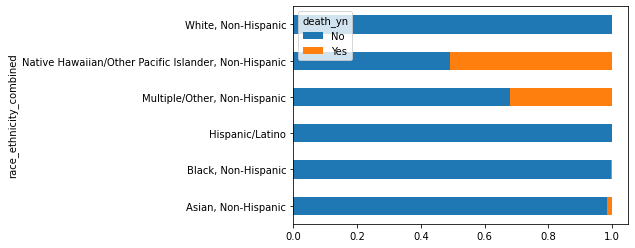

In [160]:
pd.DataFrame(death_race_df).T.stack().T[0].plot.barh(stacked=True,)

In [142]:
hospitalized_race_df = (results_df[results_df['hosp_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined','hosp_yn']).size()/results_df[results_df['hosp_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined']).size())

<AxesSubplot:ylabel='race_ethnicity_combined'>

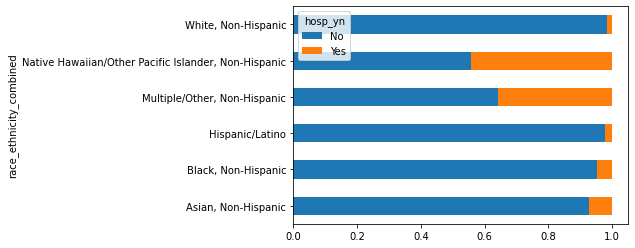

In [161]:
pd.DataFrame(hospitalized_race_df).T.stack().T[0].plot.barh(stacked=True)

In [144]:
icu_race_df = (results_df[results_df['icu_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined','icu_yn']).size()/results_df[results_df['icu_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined']).size())

<AxesSubplot:xlabel='race_ethnicity_combined'>

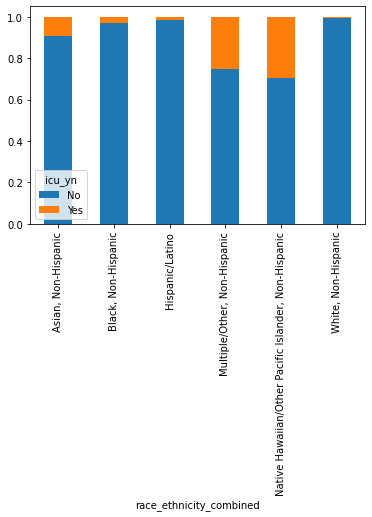

In [145]:
pd.DataFrame(icu_race_df).T.stack().T[0].plot.bar(stacked=True)

In [141]:
results_df.columns

Index(['cdc_case_earliest_dt', 'current_status', 'sex', 'age_group',
       'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn',
       'medcond_yn', 'cdc_report_dt', 'onset_dt', 'pos_spec_dt'],
      dtype='object')

In [156]:
status_race_df = (results_df.groupby(['race_ethnicity_combined','current_status']).size()/results_df.groupby(['race_ethnicity_combined']).size())

<AxesSubplot:xlabel='race_ethnicity_combined'>

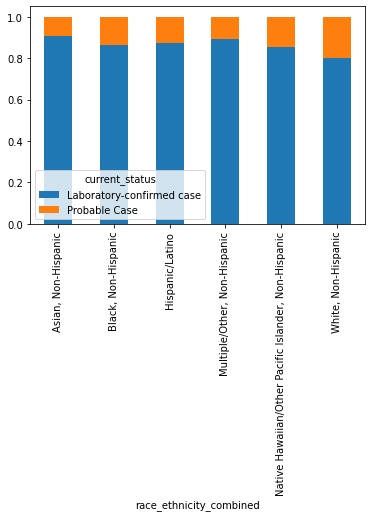

In [159]:
pd.DataFrame(status_race_df).T.stack().T[0].plot.bar(stacked=True)

In [ ]:
# Questions: 
# https://streamlit.io/gallery?category=data-visualization

In [147]:
results_df.sample(10)

,cdc_case_earliest_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_report_dt,onset_dt,pos_spec_dt
82885,2021-09-11T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,Missing,Missing,2021-09-11T00:00:00.000,2021-09-11T00:00:00.000,NaN
488750,2020-11-13T00:00:00.000,Laboratory-confirmed case,Male,50 - 59 Years,"Asian, Non-Hispanic",No,Missing,Missing,Missing,2020-11-16T00:00:00.000,2020-11-16T00:00:00.000,NaN
1132099,2021-10-22T00:00:00.000,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Missing,No,Missing,2021-10-29T00:00:00.000,2021-10-22T00:00:00.000,NaN
486632,2022-07-04T00:00:00.000,Laboratory-confirmed case,Male,50 - 59 Years,"Asian, Non-Hispanic",No,Missing,No,Missing,2022-07-06T00:00:00.000,2022-07-04T00:00:00.000,2022-07-05T00:00:00.000
26146,2021-01-20T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,Missing,Missing,2021-01-20T00:00:00.000,2021-01-20T00:00:00.000,NaN
259454,2021-02-26T00:00:00.000,Probable Case,Female,0 - 9 Years,Hispanic/Latino,No,Missing,Missing,Missing,2022-05-11T00:00:00.000,NaN,2021-02-26T00:00:00.000
1737407,2021-02-20T00:00:00.000,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",No,Missing,No,Missing,2021-05-19T00:00:00.000,2021-02-20T00:00:00.000,NaN
207777,2022-06-24T00:00:00.000,Laboratory-confirmed case,Female,0 - 9 Years,Hispanic/Latino,Missing,Missing,Missing,Missing,2022-06-24T00:00:00.000,NaN,NaN
824116,2021-10-30T00:00:00.000,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Missing,Unknown,Missing,2021-10-31T00:00:00.000,NaN,2021-10-30T00:00:00.000
316564,2022-03-24T00:00:00.000,Probable Case,Female,0 - 9 Years,Hispanic/Latino,Missing,Missing,Missing,Missing,2022-03-25T00:00:00.000,2022-03-24T00:00:00.000,NaN


In [66]:
death_race_df.reset_index()[['death_yn',0]]

,death_yn,0
0,No,0.982644
1,Yes,0.017356
2,No,0.997146
3,Yes,0.002854
4,No,0.999505
5,Yes,0.000495
6,No,0.680086
7,Yes,0.319914
8,No,0.492492
9,Yes,0.507508


In [53]:

fig, ax = plt.subplots()
# First plot the 'Male' bars for every day.
ax.bar(agg_tips.index, death_race_df['Male'], label='Male')
# Then plot the 'Female' bars on top, starting at the top of the 'Male'
# bars.
ax.bar(agg_tips.index, agg_tips['Female'], bottom=agg_tips['Male'],
       label='Female')
ax.set_title('Tips by Day and Gender')
ax.legend()

race_ethnicity_combined                               death_yn
Asian, Non-Hispanic                                   No          0.982644
                                                      Yes         0.017356
Black, Non-Hispanic                                   No          0.997146
                                                      Yes         0.002854
Hispanic/Latino                                       No          0.999505
                                                      Yes         0.000495
Multiple/Other, Non-Hispanic                          No          0.680086
                                                      Yes         0.319914
Native Hawaiian/Other Pacific Islander, Non-Hispanic  No          0.492492
                                                      Yes         0.507508
White, Non-Hispanic                                   No          0.999733
                                                      Yes         0.000267
dtype: float64

In [43]:
agg_tips = tips.groupby(['day', 'sex'])['tip'].sum().unstack().fillna(0)
agg_tips

0   race_ethnicity_combined                                  Asian, Non-Hispanic
    death_yn                                                                  No
    0                                                                   0.982644
1   race_ethnicity_combined                                  Asian, Non-Hispanic
    death_yn                                                                 Yes
    0                                                                   0.017356
2   race_ethnicity_combined                                  Black, Non-Hispanic
    death_yn                                                                  No
    0                                                                   0.997146
3   race_ethnicity_combined                                  Black, Non-Hispanic
    death_yn                                                                 Yes
    0                                                                   0.002854
4   race_ethnicity_combined 

<AxesSubplot:xlabel='race_ethnicity_combined,death_yn'>

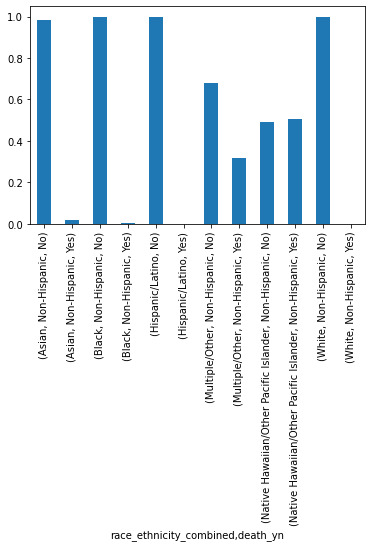

In [29]:
(results_df[results_df['death_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined','death_yn']).size()/results_df[results_df['death_yn'].isin(['Yes','No'])].groupby(['race_ethnicity_combined']).size()).plot.bar(stacked=True)

In [19]:

fig, ax = plt.subplots()
labels = list(results_df.race_ethnicity_combined.unique())

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()


plt.show()

race_ethnicity_combined
Asian, Non-Hispanic                                     362431
Black, Non-Hispanic                                     272660
Hispanic/Latino                                         381593
Multiple/Other, Non-Hispanic                             31504
Native Hawaiian/Other Pacific Islander, Non-Hispanic      1231
White, Non-Hispanic                                     950581
dtype: int64

In [ ]:
# race_ethnicity_combined

In [ ]:
# query = f"""SELECT * WHERE race_ethnicity_combined NOT IN ('Unknown','Missing','NA')"""


In [ ]:
race_ethnicity_combined,

In [ ]:
#'case_month', 'age_group', 'sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
#'death_yn', 'case_positive_specimen','medcond_yn'

In [ ]:
# https://dev.socrata.com/foundry/data.cdc.gov/vbim-akqf
#https://pypi.org/project/sodapy/ way to get only certain fields
# where="depth > 300", order="magnitude DESC", exclude_system_fields=False
# query = f"""SELECT * WHERE business_city="NEW YORK" LIMIT 50000"""
# client = Socrata("data.ny.gov", <YOUR-APP-TOKEN-HERE>)
# results = client.get("yg7h-zjbf", query=query)
# df_socrata = pd.DataFrame.from_records(results)
#'case_month', 'age_group', 'sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
#'death_yn', 'case_positive_specimen', 
    #'underlying_conditions_yn'